<a href="https://colab.research.google.com/github/EmnaGaidi/Deep-Learning/blob/main/Deep_Learning_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Travail Réalisé Par** :



*   BEN AMMAR HAMZA -groupe1-
*   OUESLATI SAFA -groupe2-
*   GAIDI EMNA -groupe1-



#### 1- Algorithme :
#### Complexité en temps : O(n * p * nbre d'iterations)
#### Compelxité en espace : O(n*p)

## Imports

In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Exercice 1

Dataset and visualization

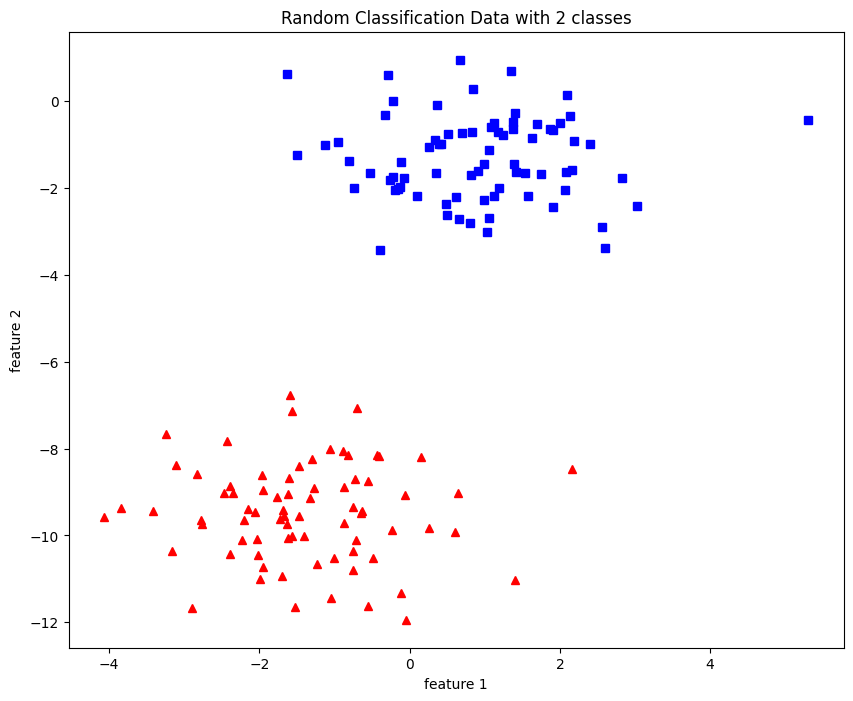

In [ ]:
X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

# Plotting
fig = plt.figure(figsize=(10, 8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Random Classification Data with 2 classes')

# Display the plot
plt.show()


In [ ]:
def acti_func(z):
  return 1 if z>0 else 0

In [ ]:
def perceptron(X, y, lr, epochs):
  # X --> Inputs.
  # y --> labels/target.
  # lr --> learning rate.
  # epochs --> Number of iterations.
  # m-> number of training examples
  # n-> number of features
  m, n = X.shape
  # Initializing parameters(theta) to zeros.
  # +1 in n+1 for the bias term.
  w = np.zeros((n+1,1))
  # Empty list to store how many examples were
  # misclassified at every iteration.
  n_miss_list = []
  error_list=[]
  accuracy=[]
  # Training.
  for epoch in range(epochs):
    # variable to store #misclassified.
    n_miss = 0
    # looping for every example.
    for idx, x_i in enumerate(X):
      # Insering 1 for bias, X0 = 1.
      x_i = np.insert(x_i, 0, 1).reshape(-1,1)
      # Calculating prediction/hypothesis.
      y_hat = acti_func(np.dot(x_i.T, w))
      # Updating if the example is misclassified.
      if (np.squeeze(y_hat) - y[idx]) != 0:
          w-=lr*(np.squeeze(y_hat) - y[idx])*x_i
          print(f"hey : {lr*(np.squeeze(y_hat) - y[idx])} * {x_i}")
      # Incrementing by 1.
          n_miss+=1
  # Appending number of misclassified examples
  # at every iteration.
    n_miss_list.append(n_miss)
    error_list.append(1-(m-n_miss)/m)
  return w, n_miss_list,error_list

In [ ]:
X.shape
w = np.zeros((3,1))
print(w)

[[0.]
 [0.]
 [0.]]


hey : -0.01 * [[ 1.        ]
 [-0.53278301]
 [-1.64847081]]
hey : 0.01 * [[  1.        ]
 [ -0.55022637]
 [-11.61661524]]
hey : -0.01 * [[ 1.        ]
 [ 1.38862276]
 [-1.4358059 ]]
hey : -0.01 * [[ 1.        ]
 [ 1.37033956]
 [-0.64022071]]
hey : -0.01 * [[ 1.        ]
 [-0.26150033]
 [-1.80587922]]
hey : -0.01 * [[ 1.        ]
 [-0.08144118]
 [-1.76413571]]
hey : -0.01 * [[ 1.        ]
 [ 1.90632766]
 [-2.43499725]]
hey : -0.01 * [[ 1.        ]
 [-1.63748148]
 [ 0.62374203]]
hey : -0.01 * [[ 1.        ]
 [-0.39019608]
 [-3.42042542]]
hey : 0.01 * [[ 1.        ]
 [-0.63819414]
 [-9.43110624]]
hey : -0.01 * [[ 1.        ]
 [ 0.90689191]
 [-1.61345206]]
hey : -0.01 * [[ 1.        ]
 [-1.49987326]
 [-1.23210622]]
hey : -0.01 * [[ 1.        ]
 [-0.12717092]
 [-1.97912985]]
hey : -0.01 * [[ 1.        ]
 [-0.74156075]
 [-2.00299703]]


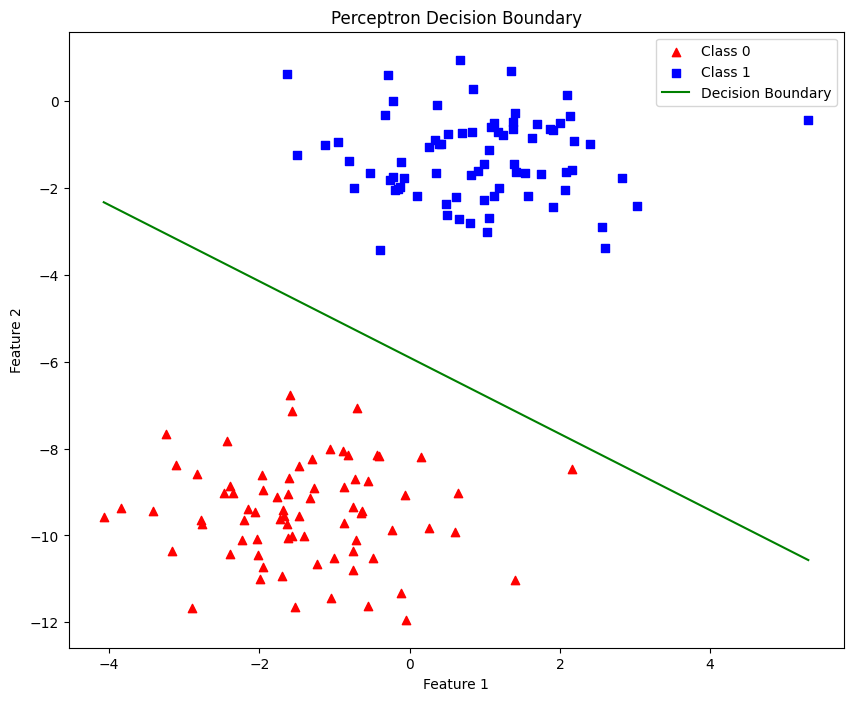

In [ ]:
def plot_decision_boundary(X,y, w):
    # Assuming X has shape (m, 2) for two-dimensional features
    plt.figure(figsize=(10, 8))

    # Scatter plot for class 0 (assuming binary classification)
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='^', label='Class 0')

    # Scatter plot for class 1
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='s', label='Class 1')

    m = -w[1] / w[2]
    c = -w[0] / w[2]

    x1 = [min(X[:, 0]), max(X[:, 0])]
    x2 = m * x1 + c
    plt.plot(x1, x2, color='green' , label='Decision Boundary')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Perceptron Decision Boundary')
    plt.legend()
    plt.show()

w, _,_ = perceptron(X, y, lr=0.01, epochs=3)
plot_decision_boundary(X,y, w)

# Exercice 2

In [ ]:
def generate_dataset(n_samples=10000, cluster_std1=0.25,center_box1=(1,0),cluster_std2=0.25,center_box2=(-1,0),random=False):
  if random:
    X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std1, random_state=2, center_box=center_box1)
    X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std2, random_state=2,center_box=center_box2)
  else:
    X1, y1 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std1, center_box=center_box1)
    X2, y2 = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=1, cluster_std=cluster_std2, center_box=center_box2)
  y2 = np.full((n_samples,), 1)

  X = np.concatenate((X1, X2), axis=0)
  y = np.concatenate((y1, y2), axis=0)

  # Shuffle the dataset
  X, y = shuffle(X, y, random_state=42)

  print("X shape:", X.shape)
  print("y shape:", y.shape)
  return X,y

### experience 1 : std=0.25

In [ ]:
from sklearn.utils import shuffle

X,y=generate_dataset(n_samples=125,random=True)

X shape: (250, 2)
y shape: (250,)


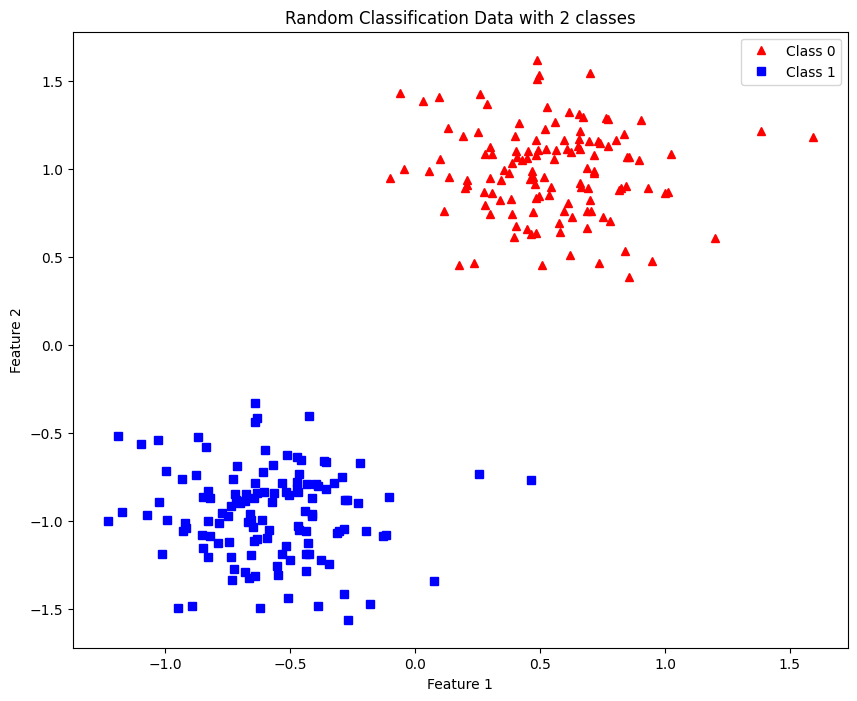

In [ ]:
# Plotting
fig = plt.figure(figsize=(10, 8))

# Plot points with label 0 in red triangles ('r^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')

# Plot points with label -1 in blue squares ('bs') - Corrected here
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class 1')

# Set labels for the x and y axes
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the title of the plot
plt.title('Random Classification Data with 2 classes')

# Display a legend in the plot
plt.legend()

# Show the plot
plt.show()

Question a : L'algorithme converge-t-il ? Pourquoi ?
L'algorithme converge car les données sont linéairement séparables. En effet, d'après le plot, les données peuvent être séparées par une seule ligne droite (ou un hyperplan dans des dimensions supérieures), donc l'algorithme de perceptron convergera.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
# training
w_train,_,_ = perceptron(X_train,y_train,0.01,3)

hey : -0.01 * [[ 1.        ]
 [-0.46487506]
 [-1.05272813]]
hey : 0.01 * [[1.        ]
 [0.6180341 ]
 [0.50942067]]


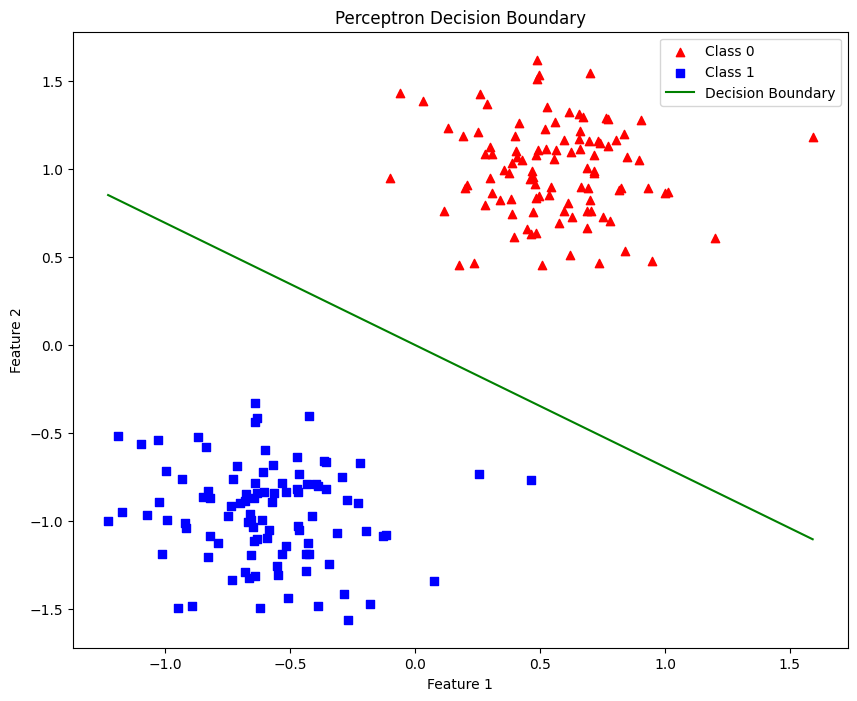

In [ ]:
plot_decision_boundary(X_train,y_train, w_train)

Question b : La limite de décision n'est pas unique, en effet on peut la déplacer par exemple en haut ou en bas en gardant la séparation entre les deux classes.

La modification de l'initialisation dans la fonction perceptron modifie le résultat de l'algorithme.

In [ ]:
def predict(weights, X_test):
    Z = np.squeeze(np.dot(X_test,weights[1:3])+weights[0])
    predictions = np.where(Z >= 0, 1, 0)
    return predictions

def accuracy(weights, X_test, y_test):
    y_pred = predict(weights, X_test)
    accuracy = np.mean(y_pred == y_test)
    missed_predictions = X_test[y_pred != y_test]
    return accuracy , 1-accuracy
print(accuracy(w_train,X_test,y_test))

(1.0, 0.0)


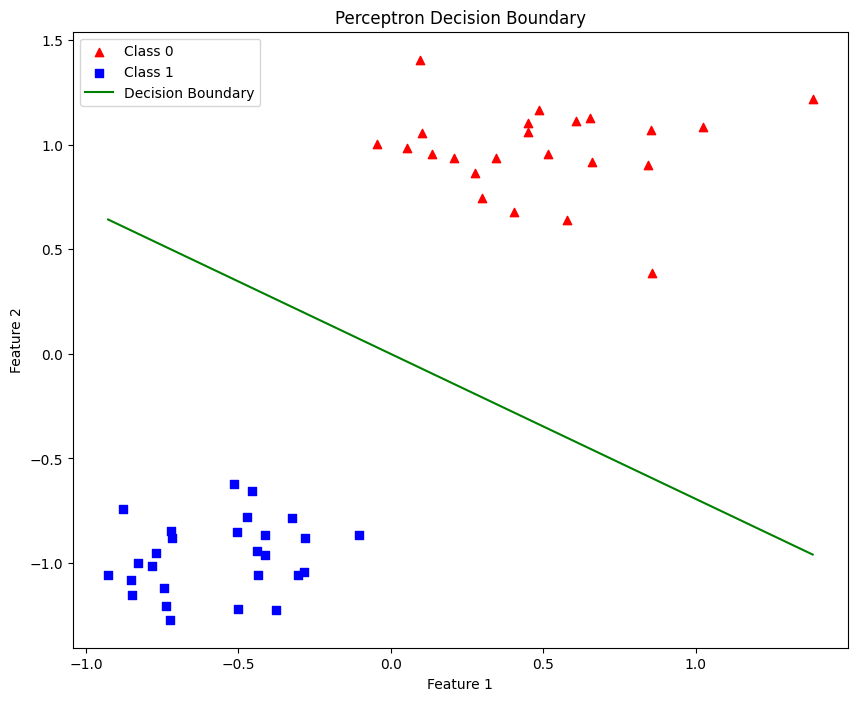

In [ ]:
# la limite de décision sur l'ensemble de test
plot_decision_boundary(X_test,y_test, w_train)

### experience 2 : std=0.75

In [ ]:
X,y=generate_dataset(n_samples=125,cluster_std1=0.75,cluster_std2=0.75,random=True)

X shape: (250, 2)
y shape: (250,)


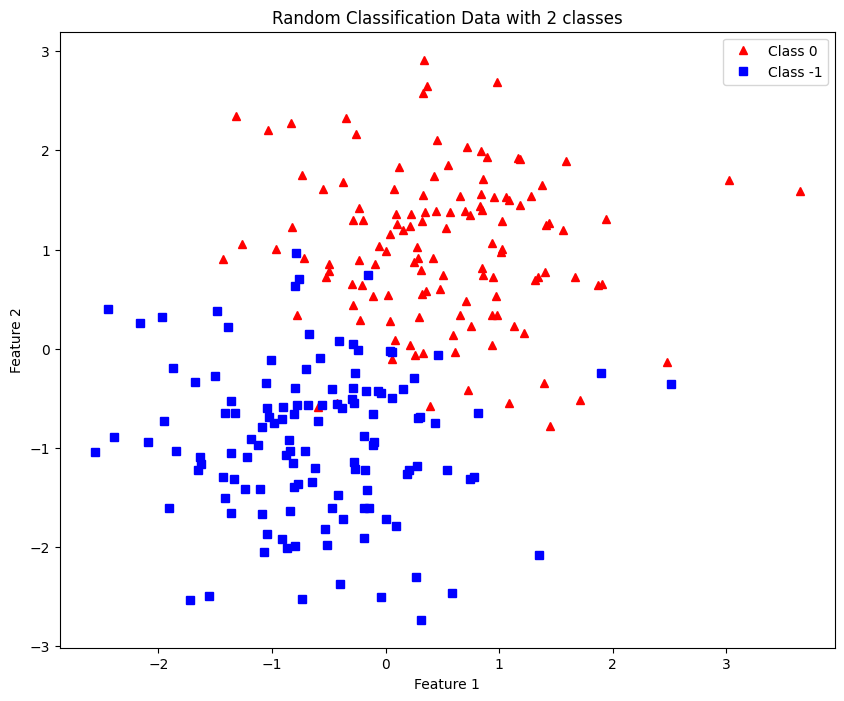

In [ ]:
# Plotting
fig = plt.figure(figsize=(10, 8))

# Plot points with label 0 in red triangles ('r^')
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^', label='Class 0')

# Plot points with label -1 in blue squares ('bs') - Corrected here
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs', label='Class -1')

# Set labels for the x and y axes
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Set the title of the plot
plt.title('Random Classification Data with 2 classes')

# Display a legend in the plot
plt.legend()

# Show the plot
plt.show()

Question a: L'algorithme ne converge pas car les données ne sont pas linéairement séparables. En effet, les données ne peuvent pas être séparées par une seule ligne droite, l'algorithme de perceptron ne convergera pas.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
w_train,_ ,_= perceptron(X_train,y_train,0.01,3)
print(w_train)

hey : -0.01 * [[ 1.        ]
 [-0.26661498]
 [-1.21003684]]
hey : 0.01 * [[1.        ]
 [0.70768533]
 [0.47741701]]
hey : -0.01 * [[ 1.        ]
 [ 0.46142147]
 [-0.06065954]]
hey : 0.01 * [[1.        ]
 [0.29064578]
 [0.31708916]]
hey : -0.01 * [[ 1.       ]
 [-0.7982081]
 [ 0.6344348]]
hey : 0.01 * [[ 1.        ]
 [ 0.7260921 ]
 [-0.41988552]]
hey : 0.01 * [[ 1.        ]
 [-0.42417035]
 [-0.54512143]]
hey : -0.01 * [[ 1.        ]
 [-0.2946551 ]
 [-0.50740846]]
hey : -0.01 * [[ 1.        ]
 [ 0.74235404]
 [-1.30969943]]
hey : 0.01 * [[1.        ]
 [0.2127454 ]
 [0.03303354]]
hey : -0.01 * [[ 1.        ]
 [-0.15041456]
 [ 0.74508224]]
hey : 0.01 * [[ 1.        ]
 [-0.20363114]
 [ 0.63794265]]
hey : 0.01 * [[ 1.        ]
 [-1.43058199]
 [ 0.9054843 ]]
hey : -0.01 * [[ 1.        ]
 [-0.2861717 ]
 [ 0.04565163]]
hey : 0.01 * [[ 1.        ]
 [ 0.2610859 ]
 [-0.06431523]]
hey : -0.01 * [[ 1.        ]
 [ 1.89580395]
 [-0.24592778]]
hey : -0.01 * [[ 1.        ]
 [-1.67585421]
 [-0.33933985]]


In [ ]:
print(accuracy(w_train,X_test,y_test))

(0.98, 0.020000000000000018)


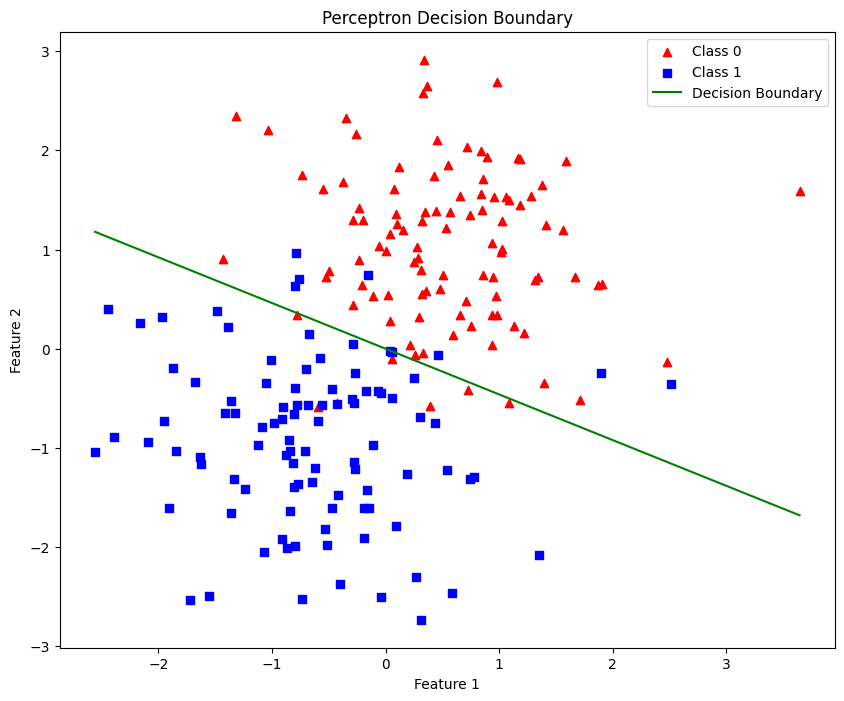

In [ ]:
plot_decision_boundary(X_train,y_train, w_train)

Question b : La limite de décision n'est pas unique en raison de la non linéarité des données car en fait on peut créer une limite en forme de courbe qui va assurer une meilleure séparation des données.

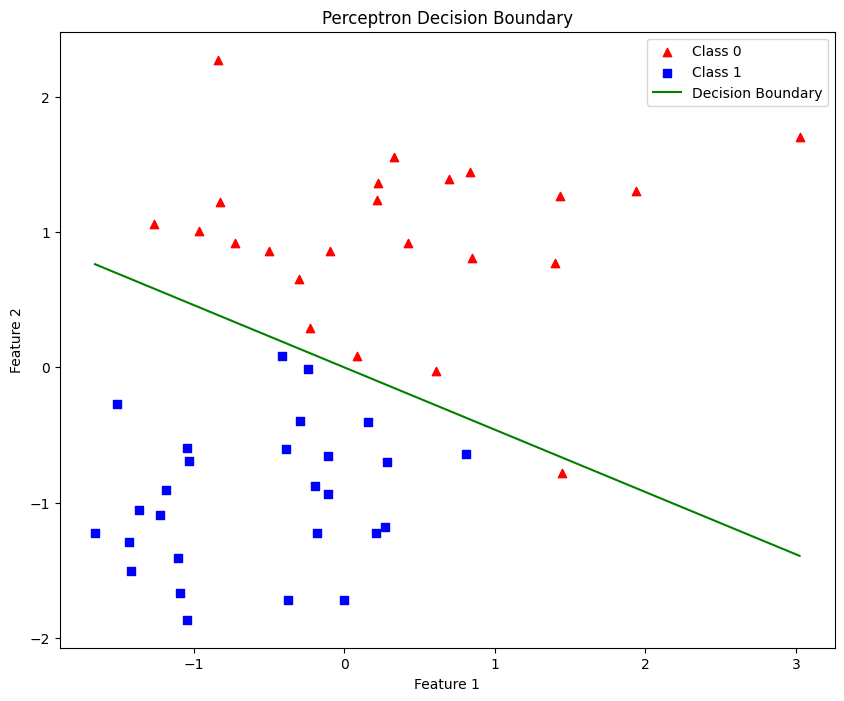

In [ ]:
# la limite de décision sur l'ensemble de test
plot_decision_boundary(X_test,y_test, w_train)

### experience 3

In [ ]:
def experience(n_samples,sigma):
  X,y=generate_dataset(n_samples=n_samples,cluster_std1=sigma,cluster_std2=sigma)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  weights,_,_=perceptron(X_train,y_train,0.01,30)
  exp_accuracy,exp_error=accuracy(weights, X_test, y_test)
  return exp_accuracy,exp_error



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sigmas = [0.01, 0.1, 0.5, 0.7]

variances_error = []
means_error = []

for sigma in sigmas:
        print(f"*********for sigma = {sigma}********")
        errors=[]
        for i in range(30):
          print(f"experience {i+1} : ")
          exp_accuracy,exp_error=experience(125,sigma)
          print(f"accuracy : {exp_accuracy}**** error : {exp_error}")
          errors.append(exp_error)
        mean_error = np.mean(errors)
        variance_error = np.var(errors)
        means_error.append(mean_error)
        variances_error.append(variance_error)

plt.figure(figsize=(10, 6))




*********for sigma = 0.01********
experience 1 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 2 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 3 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 4 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 5 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 6 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 7 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 8 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 9 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 10 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 11 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** error : 0.0
experience 12 : 
X shape: (250, 2)
y shape: (250,)
accuracy : 1.0**** err

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
print(means_error)

[0.0, 0.0, 0.10333333333333333, 0.198]


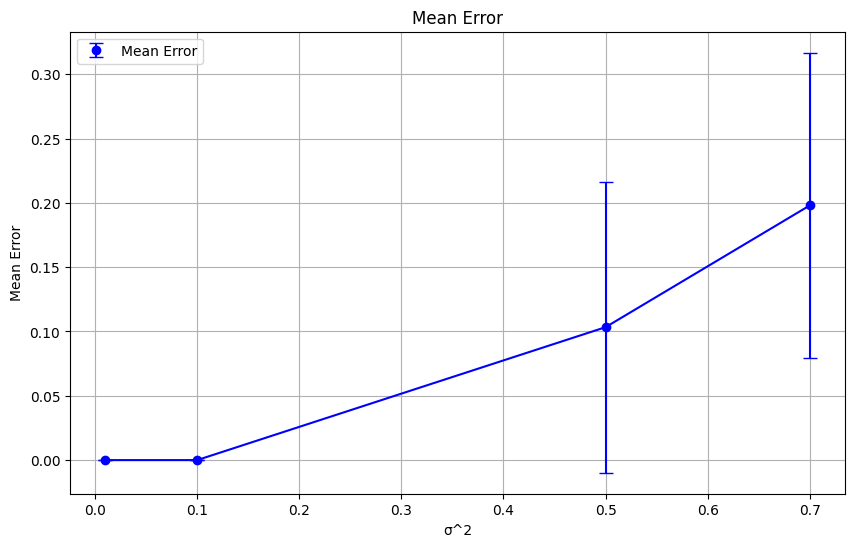

In [ ]:
plt.figure(figsize=(10, 6))
plt.errorbar(sigmas, means_error, yerr=np.sqrt(variances_error), color='b', ecolor='blue', capsize=5,fmt='o', label='Mean Error')
plt.plot(sigmas, means_error, linestyle='-', marker='', color='blue')

plt.xlabel('σ^2')
plt.ylabel('Mean Error')
plt.title('Mean Error')
plt.legend()
plt.grid(True)
plt.show()